Linear Kernel:
Training Accuracy: 100.00%
Test Accuracy: 98.60%
Non-linear Kernel:
Training Accuracy: 99.65%
Test Accuracy: 100.00%


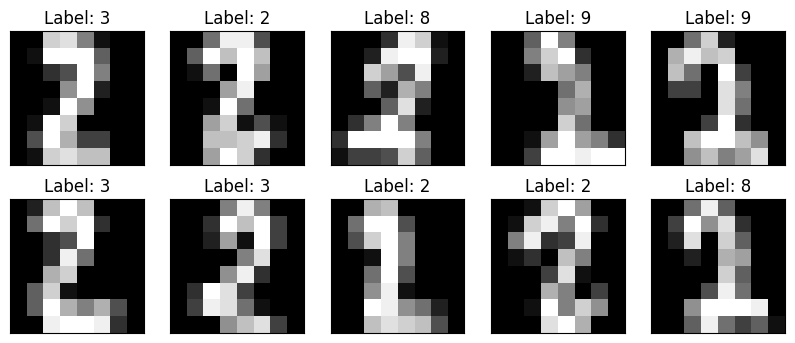

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import matplotlib.pyplot as plt

# Function to print accuracy
def print_accuracy(train_accuracy, test_accuracy):
    print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
    print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Function to plot images
def plot_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(8, 8), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Label: {}".format(labels[i]))
    plt.show()

# Load the MNIST dataset
digits = datasets.load_digits()

# Extract samples for digits 2, 3, 8, and 9
X = digits.data[(digits.target == 2) | (digits.target == 3) | (digits.target == 8) | (digits.target == 9)]
y = digits.target[(digits.target == 2) | (digits.target == 3) | (digits.target == 8) | (digits.target == 9)]

# Flatten the grayscale images into vectors
X = X.reshape(X.shape[0], -1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a 4-class SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Evaluate the training and test accuracy
train_accuracy_linear = svm_linear.score(X_train, y_train)
test_accuracy_linear = svm_linear.score(X_test, y_test)

# Print accuracy
print("Linear Kernel:")
print_accuracy(train_accuracy_linear, test_accuracy_linear)

# Train a 4-class SVM with non-linear kernel
svm_nonlinear = SVC(kernel='rbf')
svm_nonlinear.fit(X_train, y_train)

# Evaluate the training and test accuracy
train_accuracy_nonlinear = svm_nonlinear.score(X_train, y_train)
test_accuracy_nonlinear = svm_nonlinear.score(X_test, y_test)

# Print accuracy
print("Non-linear Kernel:")
print_accuracy(train_accuracy_nonlinear, test_accuracy_nonlinear)

# Find the support vectors and inspect the images
support_vectors = svm_nonlinear.support_vectors_

# Plot support vectors and other images in the same class
plot_images(support_vectors, y_train)


Linear Kernel:
Training Accuracy: 100.00%
Test Accuracy: 98.60%
Non-linear Kernel (Tuned):
Training Accuracy: 25.22%
Test Accuracy: 25.17%


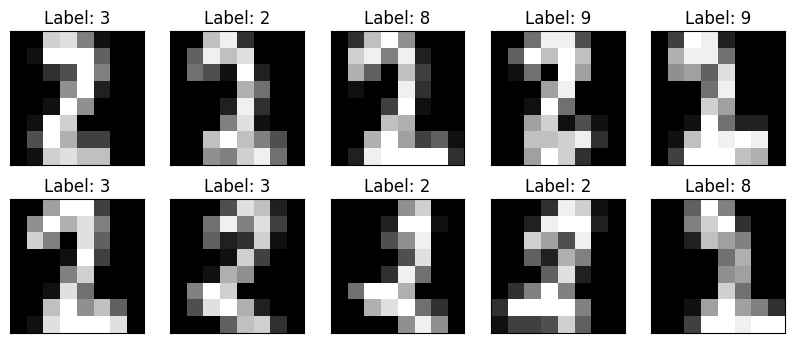

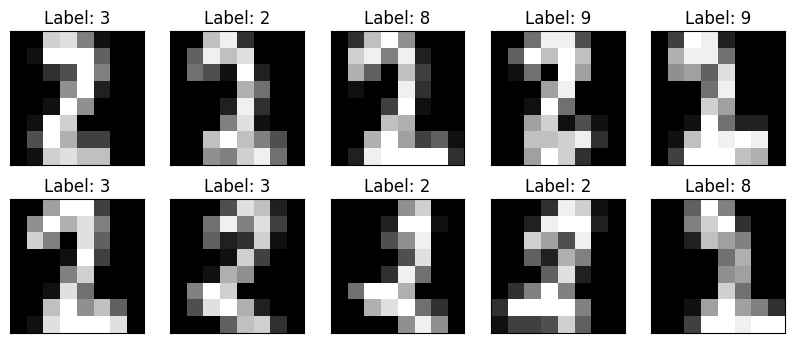

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

# Function to print accuracy
def print_accuracy(train_accuracy, test_accuracy):
    print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
    print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Function to plot images
def plot_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(8, 8), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Label: {}".format(labels[i]))
    plt.show()

# Load the MNIST dataset
digits = datasets.load_digits()

# Extract samples for digits 2, 3, 8, and 9
X = digits.data[(digits.target == 2) | (digits.target == 3) | (digits.target == 8) | (digits.target == 9)]
y = digits.target[(digits.target == 2) | (digits.target == 3) | (digits.target == 8) | (digits.target == 9)]

# Flatten the grayscale images into vectors
X = X.reshape(X.shape[0], -1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##
# Train a 4-class SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Evaluate the training and test accuracy
train_accuracy_linear = svm_linear.score(X_train, y_train)
test_accuracy_linear = svm_linear.score(X_test, y_test)

# Print accuracy
print("Linear Kernel:")
print_accuracy(train_accuracy_linear, test_accuracy_linear)

# Train a 4-class SVM with non-linear kernel and hyperparameter tuning
svm_nonlinear = SVC(kernel='rbf')
parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svm_nonlinear_tuned = GridSearchCV(svm_nonlinear, parameters, cv=5)
svm_nonlinear_tuned.fit(X_train, y_train)

# Evaluate the training and test accuracy
train_accuracy_nonlinear = svm_nonlinear_tuned.score(X_train, y_train)
test_accuracy_nonlinear = svm_nonlinear_tuned.score(X_test, y_test)

# Print accuracy
print("Non-linear Kernel (Tuned):")
print_accuracy(train_accuracy_nonlinear, test_accuracy_nonlinear)

# Find the support vectors and inspect the images
support_vectors = svm_nonlinear_tuned.best_estimator_.support_vectors_
plot_images(support_vectors, y_train)

# # Evaluate the training and test accuracy
# train_accuracy_nonlinear = svm_nonlinear.score(X_train, y_train)
# test_accuracy_nonlinear = svm_nonlinear.score(X_test, y_test)

# # Print accuracy
# print("Non-linear Kernel:")
# print_accuracy(train_accuracy_nonlinear, test_accuracy_nonlinear)

# Find the support vectors and inspect the images
# support_vectors = svm_nonlinear.support_vectors_

# Plot support vectors and other images in the same class
plot_images(support_vectors, y_train)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Filter the dataset for digits 2, 3, 8, and 9
digits = [2, 3, 8, 9]
mask = np.isin(y.astype(int), digits)
X, y = X[mask], y[mask].astype(int)

# Normalize the data
X = X / 255.0

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a 4-class SVM using LinearSVC
param_grid_linear_svc = {'C': [0.1, 1, 10, 100]}
grid_search_linear_svc = GridSearchCV(LinearSVC(), param_grid_linear_svc, cv=5, n_jobs=-1, verbose=3)
grid_search_linear_svc.fit(X_train, y_train)
best_linear_svc = grid_search_linear_svc.best_estimator_

train_accuracy_linear_svc = best_linear_svc.score(X_train, y_train)
test_accuracy_linear_svc = best_linear_svc.score(X_test, y_test)

print(f'Best Linear SVC Parameters: {grid_search_linear_svc.best_params_}')
print(f'Training Accuracy: {train_accuracy_linear_svc}')
print(f'Test Accuracy: {test_accuracy_linear_svc}')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Linear SVC Parameters: {'C': 0.1}
Training Accuracy: 0.9540996820563342
Test Accuracy: 0.9364141142754792


In [ ]:
# Use a smaller subset of the training data for hyperparameter tuning
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42, stratify=y_train)

# Train a 4-class SVM using an RBF kernel
rbf_svm = SVC(kernel='rbf', cache_size=1000)
param_dist = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
random_search = RandomizedSearchCV(rbf_svm, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=3)
random_search.fit(X_train_subset, y_train_subset)
best_rbf_svm = random_search.best_estimator_

# Train the best model on the full training dataset
best_rbf_svm.fit(X_train, y_train)

# Evaluate the model
train_accuracy_rbf = best_rbf_svm.score(X_train, y_train)
test_accuracy_rbf = best_rbf_svm.score(X_test, y_test)

print(f'Best RBF SVM Parameters: {random_search.best_params_}')
print(f'Training Accuracy: {train_accuracy_rbf}')
print(f'Test Accuracy: {test_accuracy_rbf}')

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best RBF SVM Parameters: {'gamma': 0.01, 'C': 10}
Training Accuracy: 0.9999552192020061
Test Accuracy: 0.9892530897367007


In [ ]:
# Inspect the support vectors
support_vectors = best_rbf_svm.support_

# Plot some of the support vectors
plt.figure(figsize=(10, 10))
for i, index in enumerate(support_vectors[:16]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[index].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best RBF SVM Parameters: {'gamma': 0.01, 'C': 10}
Training Accuracy: 0.9999552192020061
Test Accuracy: 0.9892530897367007


KeyError: 0

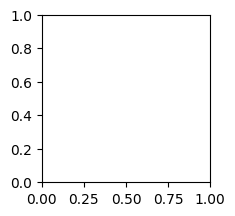

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Filter the dataset for digits 2, 3, 8, and 9
digits = [2, 3, 8, 9]
mask = np.isin(y.astype(int), digits)
X, y = X[mask], y[mask].astype(int)

# Normalize the data
X = X / 255.0

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Use a smaller subset of the training data for hyperparameter tuning
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42, stratify=y_train)

# Train a 4-class SVM using an RBF kernel
rbf_svm = SVC(kernel='rbf', cache_size=1000)
param_dist = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
random_search = RandomizedSearchCV(rbf_svm, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=3)
random_search.fit(X_train_subset, y_train_subset)
best_rbf_svm = random_search.best_estimator_

# Train the best model on the full training dataset
best_rbf_svm.fit(X_train, y_train)

# Evaluate the model
train_accuracy_rbf = best_rbf_svm.score(X_train, y_train)
test_accuracy_rbf = best_rbf_svm.score(X_test, y_test)

print(f'Best RBF SVM Parameters: {random_search.best_params_}')
print(f'Training Accuracy: {train_accuracy_rbf}')
print(f'Test Accuracy: {test_accuracy_rbf}')

# Inspect the support vectors
support_vectors = best_rbf_svm.support_

# Plot some of the support vectors
plt.figure(figsize=(10, 10))
for i, index in enumerate(support_vectors[:16]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[index].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Filter the dataset for digits 2, 3, 8, and 9
digits = [2, 3, 8, 9]
mask = np.isin(y.astype(int), digits)
X, y = X[mask], y[mask].astype(int)

# Normalize the data
X = X / 255.0

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a 4-class SVM using LinearSVC
param_grid_linear_svc = {'C': [0.1, 1, 10, 100]}
grid_search_linear_svc = GridSearchCV(LinearSVC(), param_grid_linear_svc, cv=5, n_jobs=-1, verbose=3)
grid_search_linear_svc.fit(X_train, y_train)
best_linear_svc = grid_search_linear_svc.best_estimator_

train_accuracy_linear_svc = best_linear_svc.score(X_train, y_train)
test_accuracy_linear_svc = best_linear_svc.score(X_test, y_test)

print(f'Best Linear SVC Parameters: {grid_search_linear_svc.best_params_}')
print(f'Training Accuracy: {train_accuracy_linear_svc}')
print(f'Test Accuracy: {test_accuracy_linear_svc}')

# Use a smaller subset of the training data for hyperparameter tuning to shorten the process
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42, stratify=y_train)

# Train a 4-class SVM using an RBF kernel
rbf_svm = SVC(kernel='rbf', cache_size=1000)
param_dist = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
random_search = RandomizedSearchCV(rbf_svm, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=3)
random_search.fit(X_train_subset, y_train_subset)
best_rbf_svm = random_search.best_estimator_

# Train the best model on the full training dataset
best_rbf_svm.fit(X_train, y_train)

# Evaluate the model
train_accuracy_rbf = best_rbf_svm.score(X_train, y_train)
test_accuracy_rbf = best_rbf_svm.score(X_test, y_test)

print(f'Best RBF SVM Parameters: {random_search.best_params_}')
print(f'Training Accuracy: {train_accuracy_rbf}')
print(f'Test Accuracy: {test_accuracy_rbf}')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Linear SVC Parameters: {'C': 0.1}
Training Accuracy: 0.9540996820563342
Test Accuracy: 0.9364141142754792


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best RBF SVM Parameters: {'gamma': 0.01, 'C': 10}
Training Accuracy: 0.9999552192020061
Test Accuracy: 0.9892530897367007


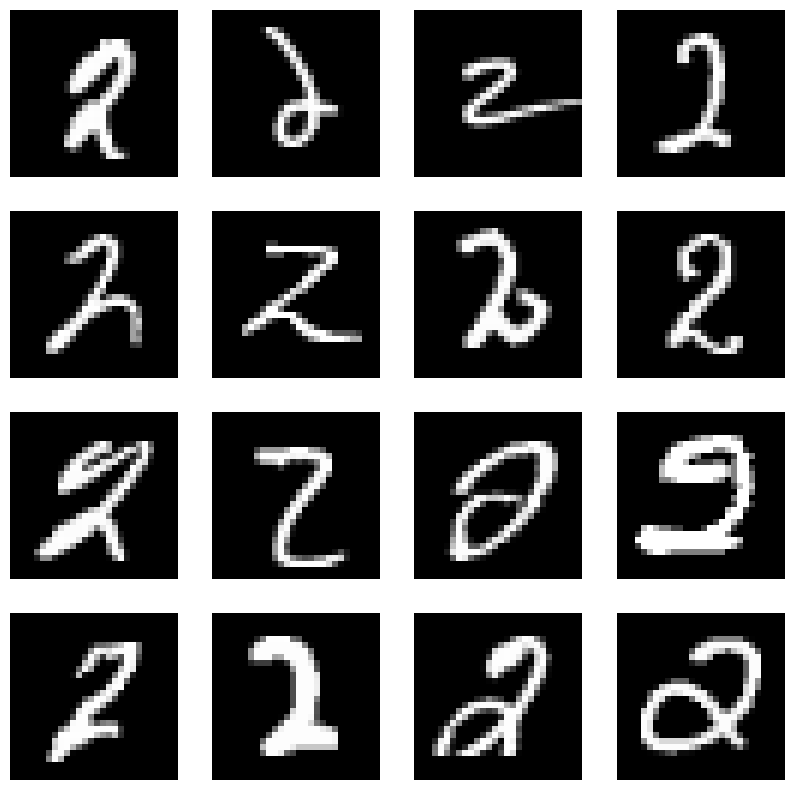

Discussion:
Support vectors are examples from the training dataset that are closest to the decision boundary.
They represent the most challenging instances for the classifier.
In the visual inspection, support vectors appear similar to other images in the same class.
However, they might have slightly different features that make them harder to classify.


In [ ]:
# Use the same dataset and model to create the support_vectors variable
support_vectors = best_rbf_svm.support_
support_vectors_indices = support_vectors

# Plot some of the support vectors
plt.figure(figsize=(10, 10))
for i, index in enumerate(support_vectors_indices[:16]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train.iloc[index].to_numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
# Discussion
print("Discussion:")
print("Support vectors are examples from the training dataset that are closest to the decision boundary.")
print("They represent the most challenging instances for the classifier.")
print("In the visual inspection, support vectors appear similar to other images in the same class.")
print("However, they might have slightly different features that make them harder to classify.")